# Finding the Right Players: Optimizing Data Collection for PlayCraft Research

## Introduction
The Pacific Laboratory for Artificial Intelligence at UBC is conducting a research project using the popular sandbox game Minecraft to study player behaviour and advance AI development. Minecraft, with its open-ended gameplay and limitless possibilities for exploration, building, and creativity, provides an ideal environment for analyzing how players interact within a virtual world. Players on the lab’s dedicated server contribute data that helps train AI systems to understand and replicate complex player patterns.To enhance their research, the team aims to recruit more players while identifying those most likely to provide valuable data. By targeting specific player types in their recruitment efforts, they hope to optimize data collection and refine AI training processes. This report examines these player types to support the lab’s goals of improving AI systems and deepening their understanding of player behaviour.

Our research question is to identify what types, specifically focusing on age, experience, and gender, of players are most likely to contribute the highest number of played hours, so we can target them for recruitment to gather more data? Specifically, we aim to identify patterns in player's charactetics based on their gaming experience, age, and gender.


## Data Description
We analyzed two datasets related to players of PlayCraft: the Players dataset, which contains key player attributes, and the Sessions dataset, which includes details on individual play sessions, such as start and end times. While the Sessions dataset focuses on session-specific activities, we will center our analysis on the Players dataset since it includes the necessary variables, such as experience and age, to address our research question.

**player.csv:**
- **196 observations**, **9 variables**

**Categorical**
- **Experience**: Player's Minecraft experience (e.g Pro, Regular, etc.)
- **hashedEmail**: A string of random characters as an identifier for each player
- **Name**: Player's name
- **Gender**: Self-declared gender (e.g Male, Female, Non-binary)

**Numerical:**
- **Played_hours**: Total hours played
- **Age**: The age of the player 

**Logical:**
- **Subscribe**: Whether the player is subscribed to recieve emails
- **individualId**: Identifier for the player
- **organizationName**: The name of the player's organization

**Potential Issues:**
- No clear definition for experience categories like "Pro" or "Regular", which can lead to varying interpretations.
- Players may exaggerate or lie about their age, as we observe data from someone entering 99.


We will focus on experience, age and gender and how these variables contribute to the ampount of hours played by each group. Experience (a categorical variable indicating player expertise) can help examine how different levels of experience correlate with playtime. Each experience sub categories will be defined.
- Beginner: Players who are new to the game/ not experienced with the gameplay.
- Amateur: Players with some experience and have a moderate understanding of minecraft gamepley.
- Veteran: Long-time players with a strong commitment.
- Pro: Expert-level players who has a strong knowlegde about the mechanics of minecraft.

Age (numerical) may reveal trends in how age influences gaming habits. Gender (categorical) could provide insight into how different self-declared genders engage with the game. Finally, Played_hours (numerical) is our response variable, helping identify the most engaged players and guiding recruitment for data collection.
Our data preparation will involve addressing missing values, selecting relevant columns for the analysis, and handling outliers (e.g., excluding unrealistic ages and excessive playtime) to ensure the integrity of the data.

In [2]:
#Load tidyverse, etc
library(tidyverse)
library(rvest)
library(tidymodels)
library(gridExtra)

set.seed(100)
# Load the players.csv, Loading in sessions.csv data file is not needed as we are ONLY focusing on data from the player set
players <- read_csv("https://raw.githubusercontent.com/doofyplayer/DSCI-Minecraft-Data/refs/heads/main/players.csv")

#Remove outlier data (rows where age > 60) and select relevant columns needed to answer my question, such as gender, experience, and age.
# other outlier data is removing ages smaller than 5 and played hours greater than 12 as it skews the distrubution of the data
player_select <- players |>
  select(experience, played_hours, age, gender) |>
    filter(age < 90) |>
    filter(age > 5) |>
    filter(played_hours < 10)

head(player_select)




── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────

experience,played_hours,age,gender
<chr>,<dbl>,<dbl>,<chr>
Veteran,3.8,17,Male
Veteran,0.0,17,Male
Amateur,0.7,21,Female
Regular,0.1,21,Male
Amateur,0.0,17,Female
Regular,0.0,19,Female


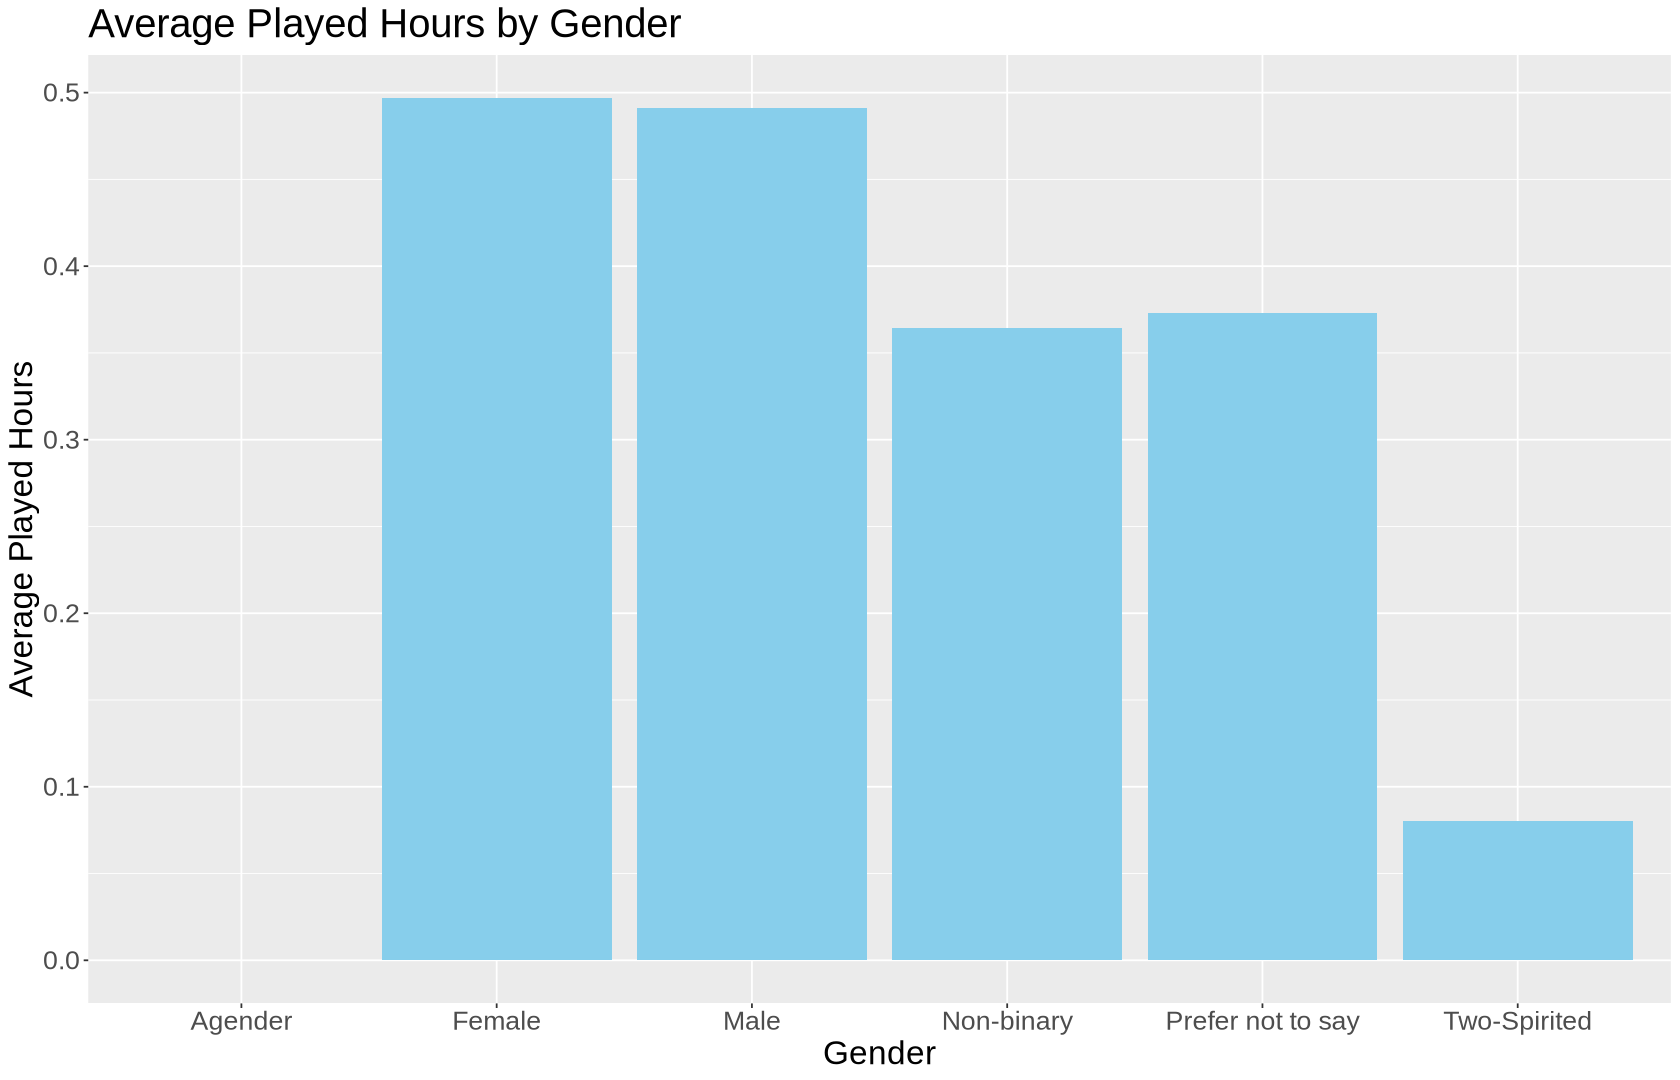

In [3]:
set.seed(100)
options(repr.plot.width = 14, repr.plot.height = 9)
# Calculate average played hours for each gender
average_played_hours <- player_select |>
  group_by(gender) |>
  summarize(avg_played_hours = mean(played_hours, na.rm = TRUE))

# bar plot of average played hours by gender
ggplot(average_played_hours, aes(x = gender, y = avg_played_hours)) +
  geom_bar(stat = "identity", fill = "skyblue") + 
  labs(title = "Average Played Hours by Gender",
       x = "Gender",
       y = "Average Played Hours") +
  theme(text = element_text(size = 20))



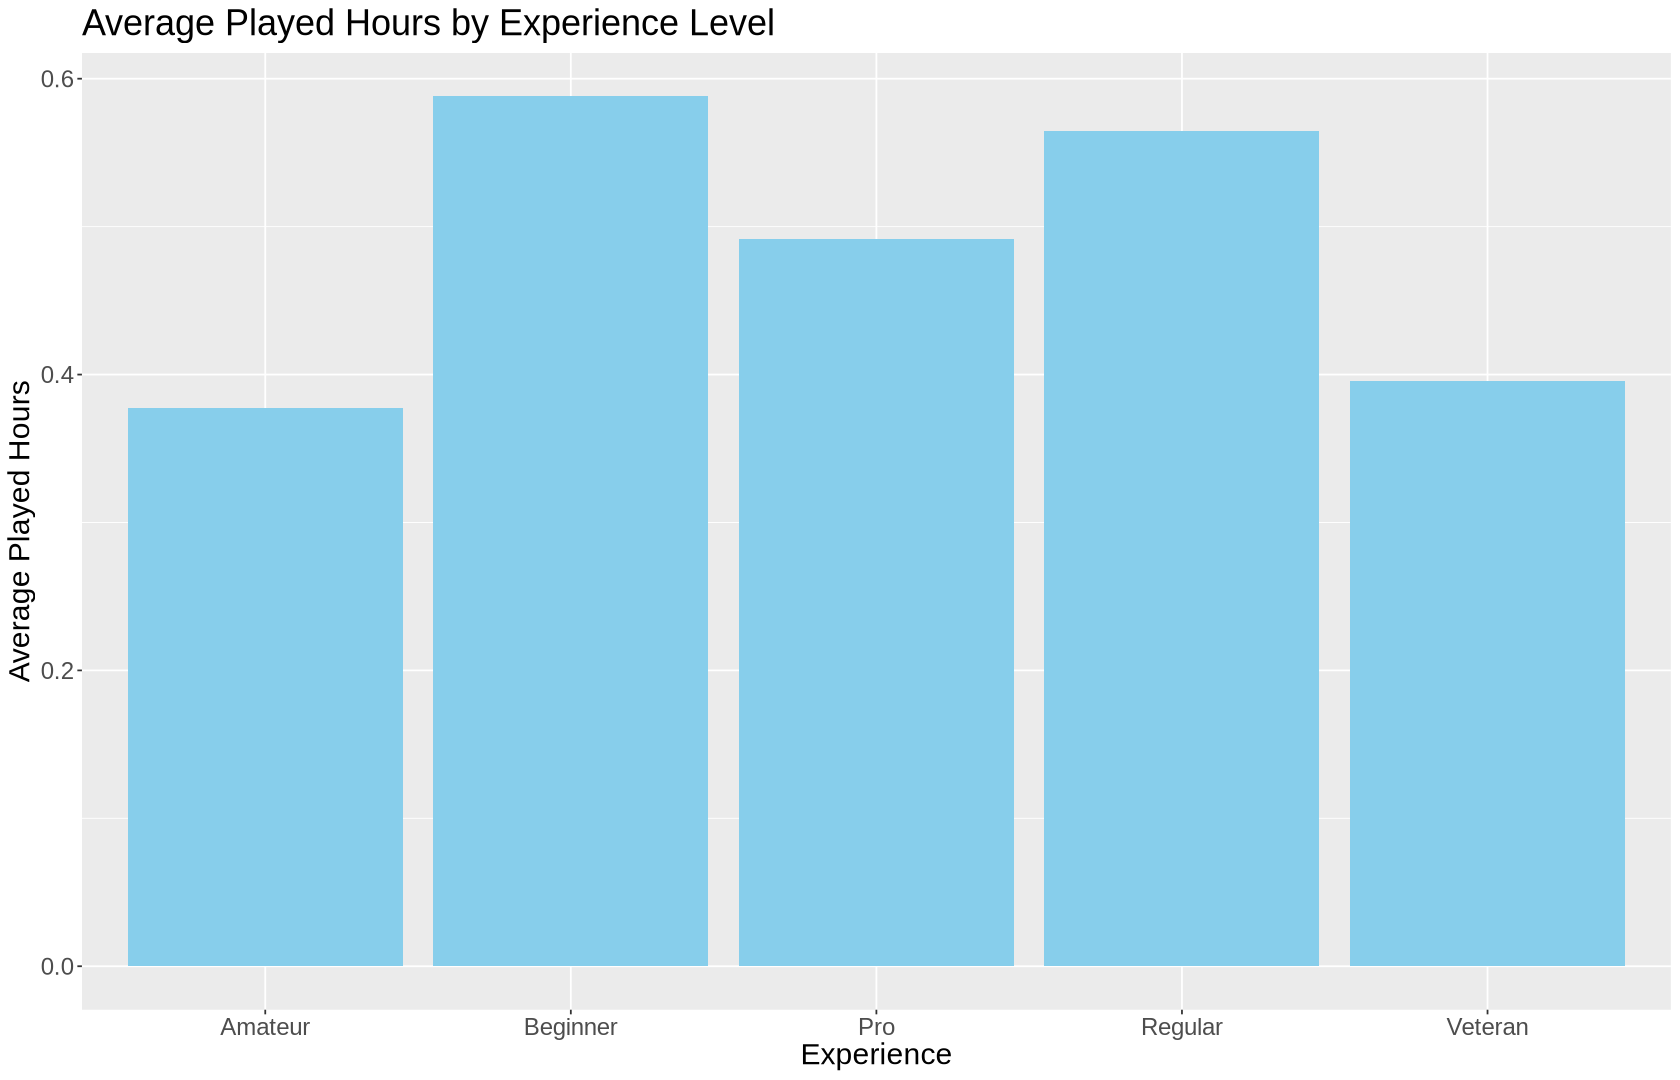

In [5]:
set.seed(100)
# A bar graph showing the average played_hours for each experience level
player_select |>
  group_by(experience) |>
  summarise(avg_played_hours = mean(played_hours, na.rm = TRUE)) |> 
  ggplot(aes(x = experience, y = avg_played_hours)) + 
  geom_bar(stat = "identity", fill = "skyblue") +  
  labs(title = "Average Played Hours by Experience Level",
       x = "Experience",
       y = "Average Played Hours") +  
  theme(text = element_text(size = 18))

In [26]:
set.seed(100)

player_split <- initial_split(player_select, prop = 0.75, strata = played_hours)
head(player_select)
# Create the training and testing sets
player_train <- training(player_split)
player_test <- testing(player_split)

experience,played_hours,age,gender,experience_numeric
<fct>,<dbl>,<dbl>,<chr>,<dbl>
Veteran,3.8,17,Male,5
Veteran,0.0,17,Male,5
Amateur,0.7,21,Female,1
Regular,0.1,21,Male,4
Amateur,0.0,17,Female,1
Regular,0.0,19,Female,4


In [28]:
set.seed(100)
# Define the KNN model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular",  
                             neighbors = tune()) |>       # We will tune the number of neighbors
  set_engine("kknn") |>                                 
  set_mode("regression")  

# Define the recipe for preprocessing without dummy variables
knn_recipe <- recipe(played_hours ~ experience + age + gender, data = player_select) |>
  step_mutate(
    gender = as.numeric(as.factor(gender)),         # Encode gender as numeric levels
    experience = as.numeric(as.factor(experience)) # Encode experience as numeric levels
  ) |>
  step_normalize(all_numeric_predictors())          # Scale and center numeric predictors

In [29]:
set.seed(100)
# 5-fold cross-validation
knn_vfold <- vfold_cv(player_select, v = 5, strata = played_hours)  # Stratify by the target variable (played_hours)
# Create a workflow
knn_wkflw <- workflow() |>
  add_recipe(knn_recipe) |>  # Add the recipe for preprocessing
  add_model(knn_spec)         # Add the KNN model specification
# Define the grid for tuning the number of neighbors
gridvals <- tibble(neighbors = seq(from = 1, to = 30, by = 2)) 
# Tune the model using cross-validation and the grid for neighbors
knn_results <- knn_wkflw |>
  tune_grid(resamples = knn_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")  


knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,1.2814831,5,0.09487989,Preprocessor1_Model01
3,rmse,standard,1.1166176,5,0.11057915,Preprocessor1_Model02
5,rmse,standard,1.1090294,5,0.10631572,Preprocessor1_Model03
7,rmse,standard,1.0554186,5,0.09627969,Preprocessor1_Model04
9,rmse,standard,1.0614735,5,0.09610202,Preprocessor1_Model05
11,rmse,standard,1.0490483,5,0.09156722,Preprocessor1_Model06
13,rmse,standard,1.0174833,5,0.08482026,Preprocessor1_Model07
15,rmse,standard,1.0150464,5,0.08268247,Preprocessor1_Model08
17,rmse,standard,1.0077767,5,0.08171775,Preprocessor1_Model09


In [22]:
# Filter results for the RMSE metric and select the best number of neighbors
best_knn_results <- knn_results |>
  filter(.metric == "rmse") |>  
  slice_min(mean, n = 1)         


best_knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
29,rmse,standard,0.9901432,5,0.08680927,Preprocessor1_Model15


In [23]:
set.seed(100)
# Extract the best number of neighbors
best_neighbors <- best_knn_results |>
  pull(neighbors)

# Define the final KNN model using the best number of neighbors
final_knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                                   neighbors = best_neighbors) |>
  set_engine("kknn") |>
  set_mode("regression")

# Finalize the workflow with the best model
final_knn_wkflw <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(final_knn_spec) |>
  fit(data = player_select)

# Predict and evaluate the model
final_predictions <- final_knn_wkflw |>
  predict(new_data = player_select) |>
  bind_cols(player_select) |>
  metrics(truth = played_hours, estimate = .pred)


final_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.97815176
rsq,standard,0.02337222
mae,standard,0.57713850


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


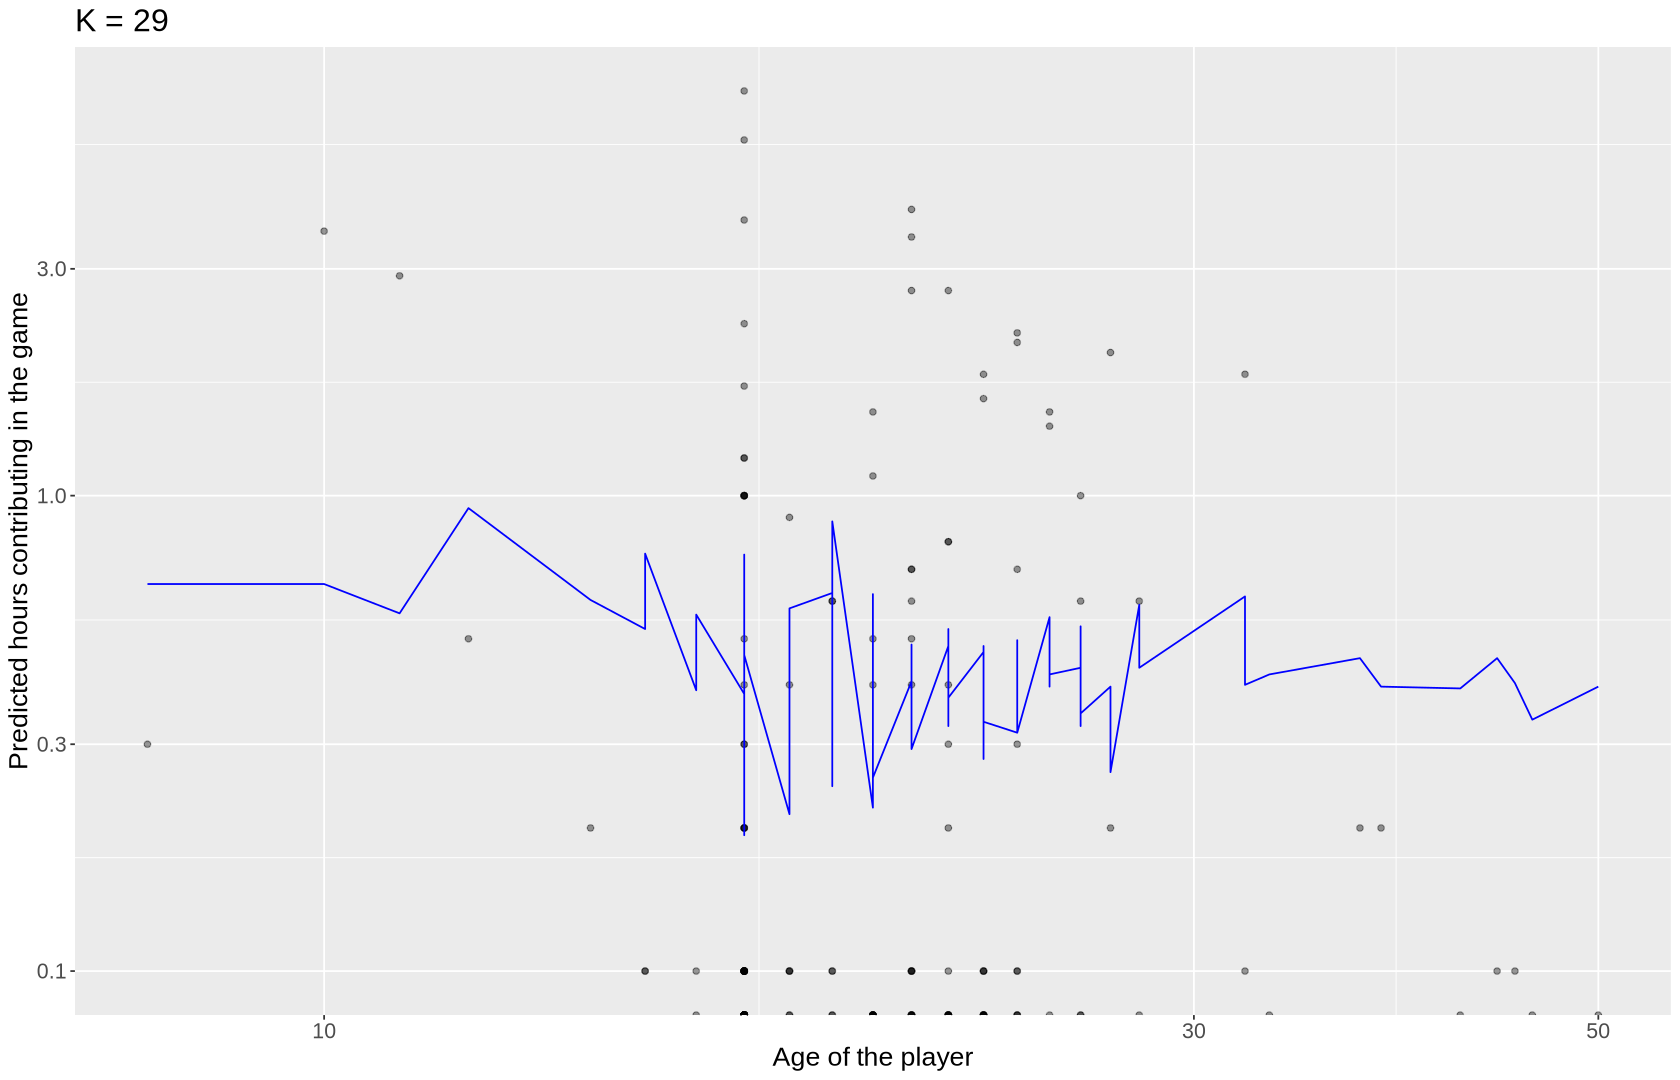

In [33]:
set.seed(100)
hours_preds<- final_knn_wkflw |>
predict(player_select)|>
bind_cols(player_select)

hour_plot<-ggplot(hours_preds, aes(x = age, y = played_hours)) +
  geom_point(alpha = 0.4) +
  geom_line(data = hours_preds,
            mapping = aes(x = age, y =.pred),
            color = "blue") +
  xlab("Age of the player") +
  ylab("Predicted hours contributing in the game") +
  ggtitle(paste0("K = ", best_neighbors)) +
  theme(text = element_text(size = 16))+
 scale_x_log10() +  # Apply log transformation to the x-axis (Age)
  scale_y_log10() 
hour_plot

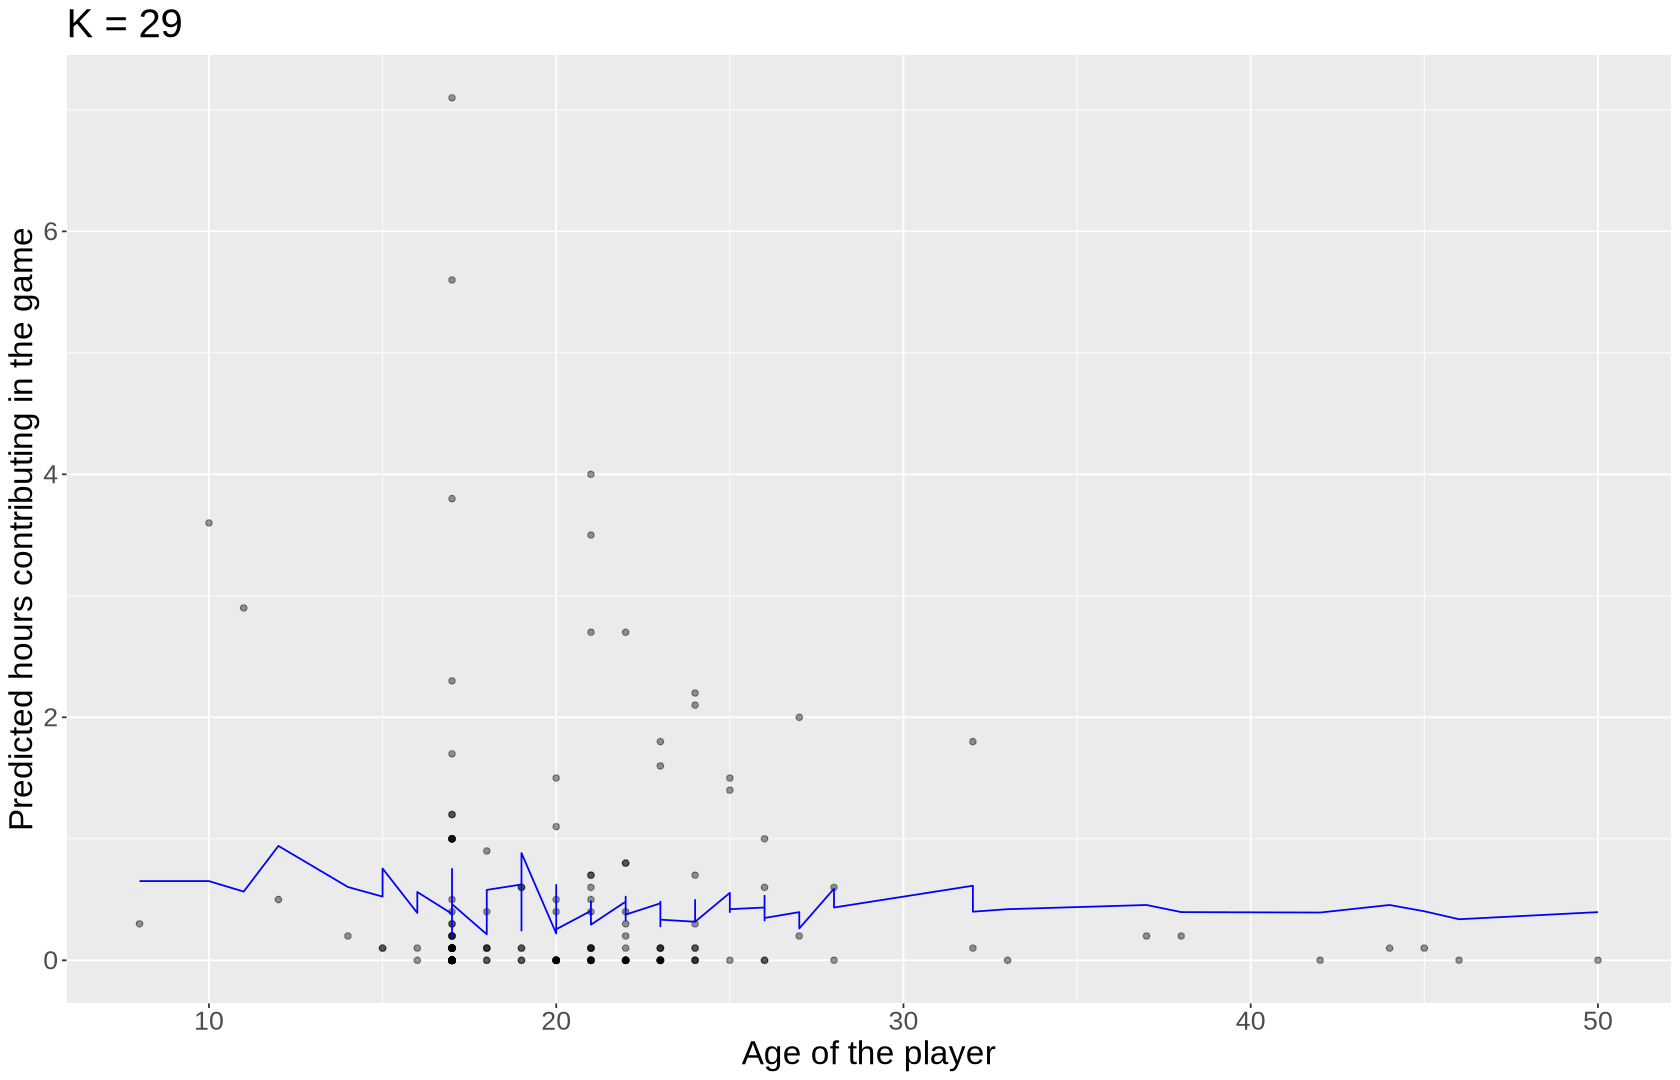

In [25]:
set.seed(100)
hours_preds<- final_knn_wkflw |>
predict(player_select)|>
bind_cols(player_select)
# No Answer - remove if you provide an answer

hour_plot<-ggplot(hours_preds, aes(x = age, y = played_hours)) +
  geom_point(alpha = 0.4) +
  geom_line(data = hours_preds,
            mapping = aes(x = age, y =.pred),
            color = "blue") +
  xlab("Age of the player") +
  ylab("Predicted hours contributing in the game") +
  ggtitle(paste0("K = ", best_neighbors)) +
  theme(text = element_text(size = 20))
hour_plot